<h1 style="text-align:center;">Cyclistic Case Study</h1>

## Table of Contents
1. [Intro](#intro)

2. [Ask](#ask)

3. [Prepare](#prepare)

4. [Process](#process)

5. [Analyze](#analyze)

6. [Share](#share)

7. [Act](#act)

## Intro<a name="intro"></a>
The goal of this project is to gain insight into how casual riders and annual members differ in their usage of a bike-share company. Within the company, the director of marketing believes that the company's future success depends on maximizing the number of annual memberships. Therefore, the insights found in this analysis will be used to design a digital marketing strategy aimed at converting casual riders into annual members. 

For the purpose of this study, **casual riders** are defined as customers who purchase single-ride or full-day passes, while **Cyclistic members** or **members** are customers who purchase an annual membership. 

## Ask<a name="ask"></a>
The question we are seeking to answer in this study is, "How do annual members and casual riders use Cyclistic bikes differently?"

## Prepare<a name="prepare"></a>
The data we will use for this study is the previous 12 months worth of Cyclistic trip data. At the time this notebook was created, the 12 months were August 2023-July 2024. The data was pulled from an online database where the company keeps monthly trip information in .csv files. The data is the company's internal data. After downloading the data, it will be brought info this notebook. 

In [1]:
# Importing data science libraries
import pandas as pd
import numpy as np
import glob
import os

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import missingno as msno
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('ggplot')
colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4', '#268bd2', '#2aa198', '#859900']


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
path = 'data'
csv_files = glob.glob(os.path.join(path, "*.csv"))

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

## Process<a name="process"></a>
Now that we have the csv files imported, we will combine them and begin exploring our dataset to get a better idea of what information we have available for analysis. We'll make sure that the data types for each column have been properly interpreted, and if not we'll change the type. We will also proceed with cleaning the data. We'll find out if there are any missing values and/or data that seems off and then figure out what to do with those records. 

In [3]:
# Combining the data into a single data frame and drop duplicates from a column that should only have unique IDs
df = pd.concat(dfs, ignore_index=True).drop_duplicates('ride_id') 

# Checking the combined data frame
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
5,F7D7420AFAC53CD9,electric_bike,2023-10-04 17:10:59,2023-10-04 17:25:21,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898124,-87.637533,41.921540,-87.653818,member
6,870B2D4CD112D7B7,electric_bike,2023-10-31 17:32:20,2023-10-31 17:44:20,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898177,-87.637549,41.921540,-87.653818,member
7,D9179D36E32D456C,classic_bike,2023-10-02 18:51:51,2023-10-02 18:57:09,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,casual
8,F8E131281F722FEF,classic_bike,2023-10-17 08:28:18,2023-10-17 08:50:03,Calumet Ave & 18th St,13102,Morgan St & Polk St,TA1307000130,41.857618,-87.619411,41.871737,-87.651030,member
9,91938B71748FA405,classic_bike,2023-10-17 19:17:38,2023-10-17 19:32:23,Wolcott Ave & Polk St,TA1309000064,Morgan St & Polk St,TA1307000130,41.871262,-87.673688,41.871737,-87.651030,member


In [4]:
# Getting some basic info on the data
df.shape

(5715482, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.5+ MB


In [6]:
# Converting `started_at` and `ended_at` to datetime format
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 610.5+ MB


In [7]:
# Converting the `member_casual` and `rideable_type` columns to categories
df['member_casual'] = df['member_casual'].astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(5)
memory usage: 534.2+ MB


In [8]:
# Sorting by datetime, most recent first, to check that data has been properly imported and merged.
df.sort_values('started_at', ascending = False).head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1594323,7F02F9C9518DE899,electric_bike,2024-07-31 23:56:29.404,2024-07-31 23:59:06.026,Montrose Harbor,TA1308000012,NaN,NaN,41.963982,-87.638181,41.960000,-87.640000,member
1217211,D8EA77522CDD0963,electric_bike,2024-07-31 23:55:00.044,2024-07-31 23:58:09.805,Wilton Ave & Belmont Ave,TA1307000134,NaN,NaN,41.940232,-87.652944,41.950000,-87.650000,member
1098968,95217BF2C770F4DE,electric_bike,2024-07-31 23:54:26.535,2024-07-31 23:57:52.119,Stetson Ave & South Water St,TA1308000029,Cityfront Plaza Dr & Pioneer Ct,13427,41.886835,-87.622320,41.890573,-87.622072,casual
1028136,08C302BA8CA35FC2,electric_bike,2024-07-31 23:54:00.718,2024-07-31 23:55:50.961,State St & Chicago Ave,21544,NaN,NaN,41.896617,-87.628579,41.900000,-87.630000,casual
1253867,C4121F2D05CE827E,electric_bike,2024-07-31 23:53:36.244,2024-07-31 23:56:48.209,NaN,NaN,NaN,NaN,41.930000,-87.650000,41.930000,-87.650000,casual
1351965,51A1A9F12078A3A9,electric_bike,2024-07-31 23:53:25.120,2024-07-31 23:57:01.391,Wells St & Elm St,KA1504000135,Wells St & Huron St,TA1306000012,41.903222,-87.634324,41.894722,-87.634362,casual
1627284,F150109CFA419D6E,electric_bike,2024-07-31 23:53:13.100,2024-07-31 23:59:00.637,NaN,NaN,Clark St & Lincoln Ave,13179,41.930000,-87.650000,41.915689,-87.634600,member
1050922,AF0F739C3F723C91,electric_bike,2024-07-31 23:52:35.503,2024-07-31 23:55:43.916,Halsted St & Wrightwood Ave,TA1309000061,NaN,NaN,41.929143,-87.649077,41.930000,-87.650000,member
1085365,5916FA2F813E5E74,electric_bike,2024-07-31 23:52:31.416,2024-07-31 23:55:21.415,Sheridan Rd & Irving Park Rd,13063,NaN,NaN,41.954245,-87.654406,41.960000,-87.650000,member
1655166,6441AE460141DB52,electric_bike,2024-07-31 23:52:14.182,2024-07-31 23:59:06.039,Clarendon Ave & Junior Ter,13389,Pine Grove Ave & Waveland Ave,TA1307000150,41.961004,-87.649603,41.949473,-87.646453,casual


In [9]:
# Checking if there are any missing values across each column
df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [10]:
# Showing how many missing values there are from each column
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    947002
start_station_id      947002
end_station_name      989396
end_station_id        989396
start_lat                  0
start_lng                  0
end_lat                 7716
end_lng                 7716
member_casual              0
dtype: int64

<Axes: >

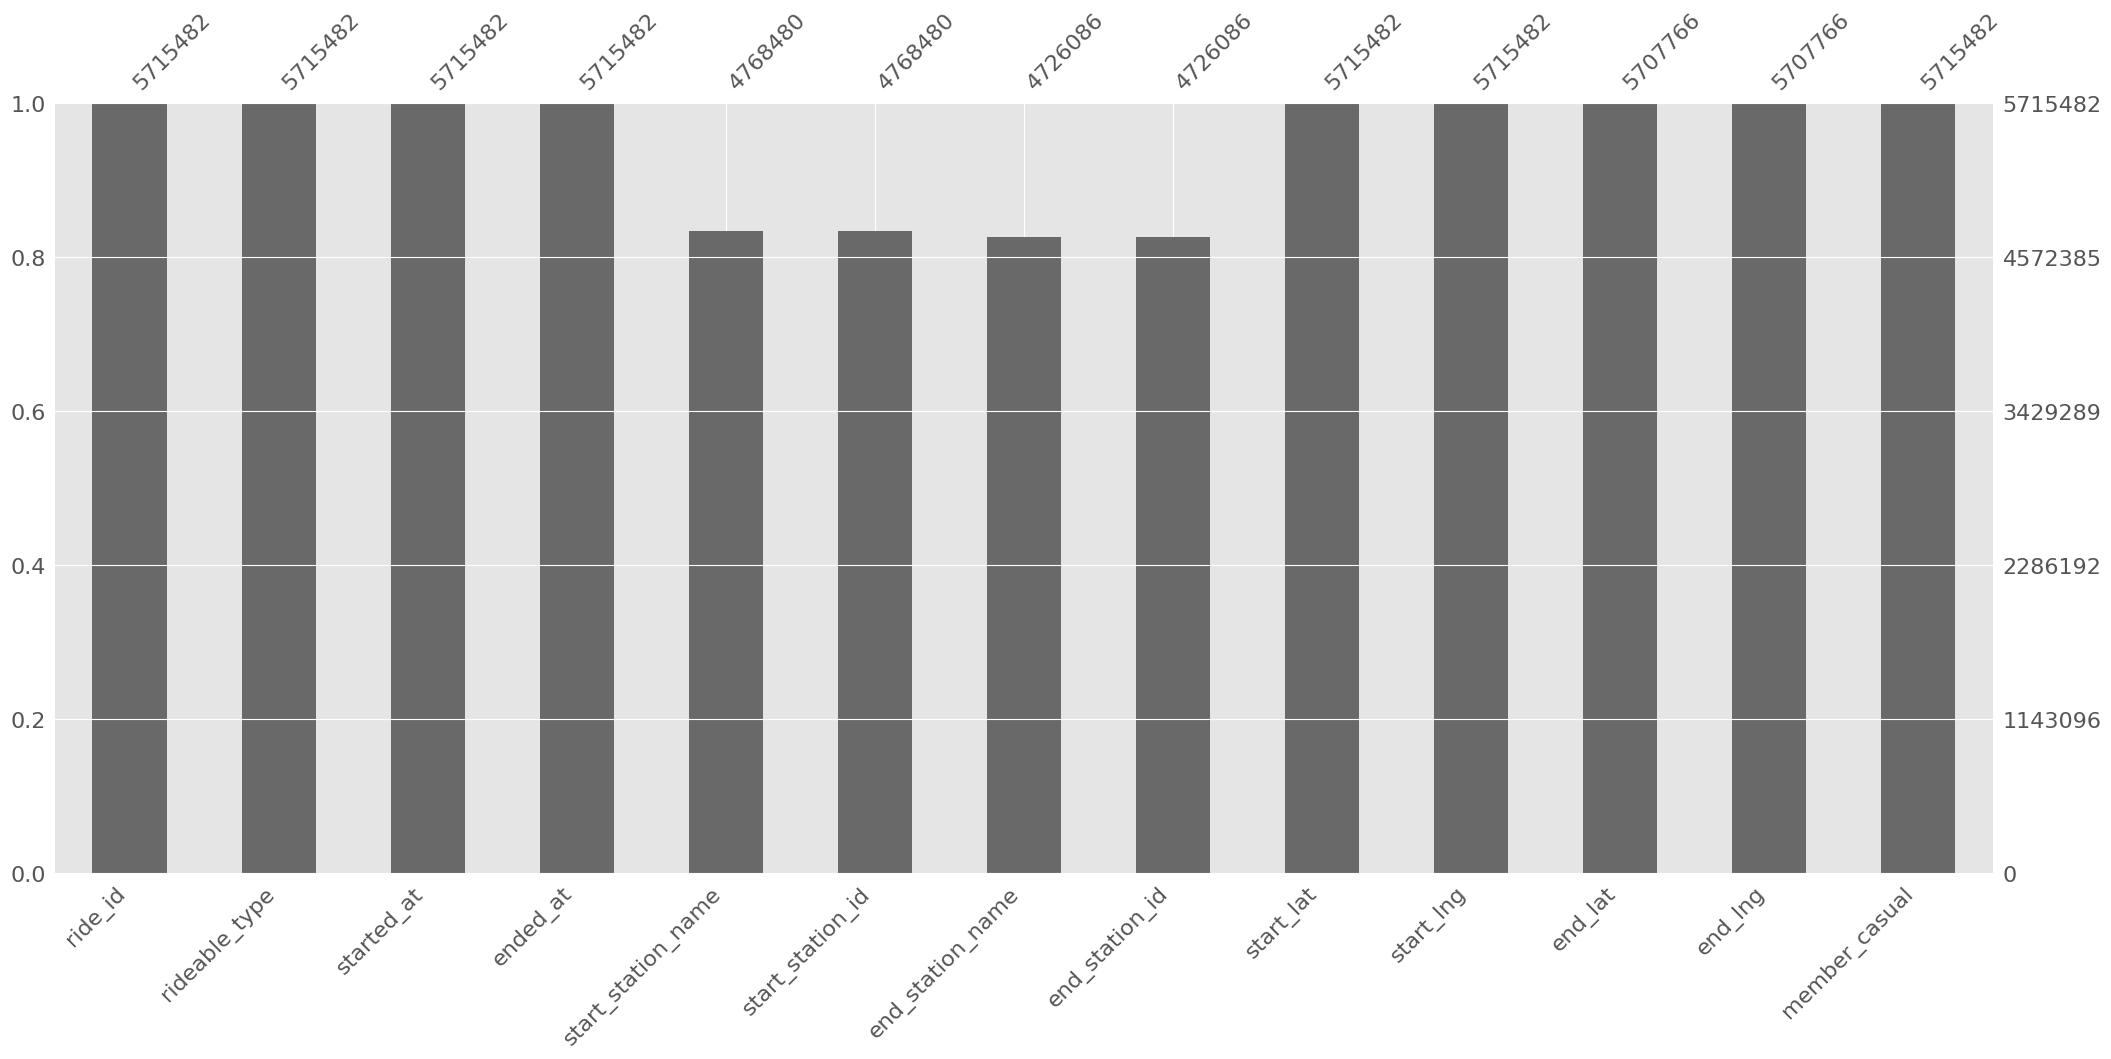

In [11]:
# A couple visualizations to show missing data
msno.bar(df)

<Axes: >

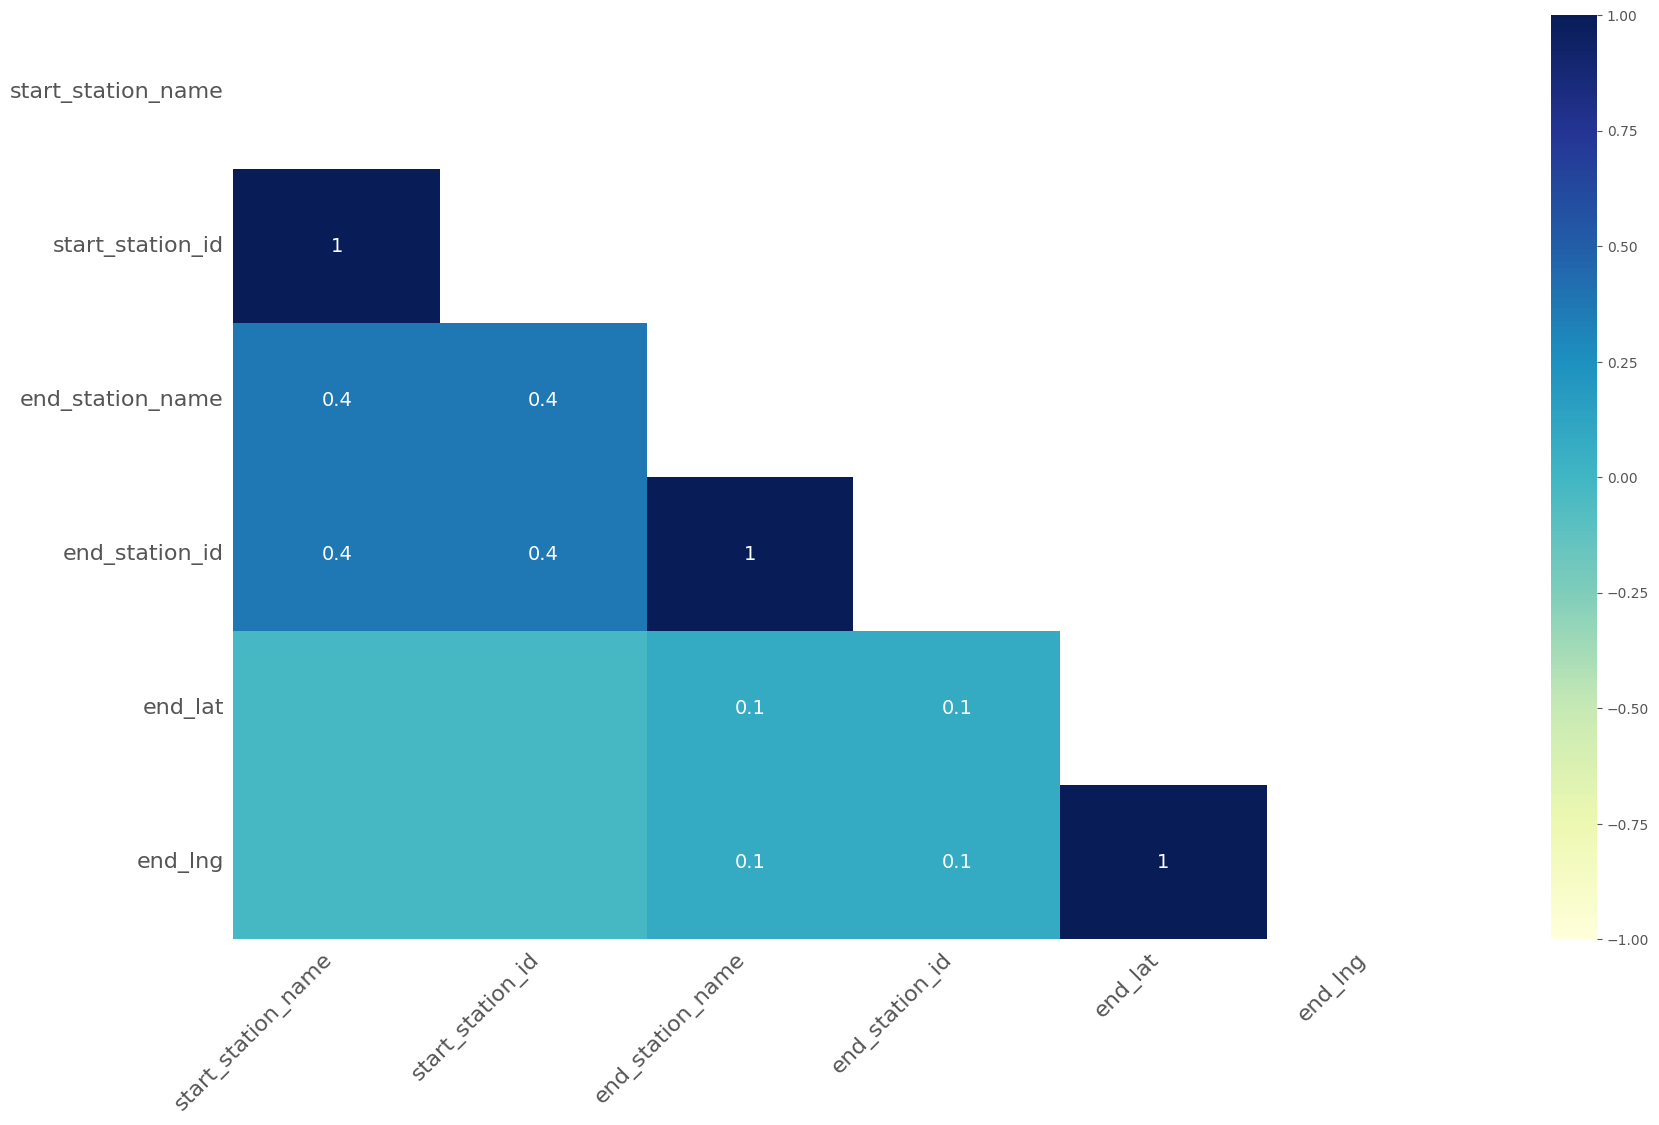

In [12]:
msno.heatmap(df, cmap='YlGnBu')

<Axes: >

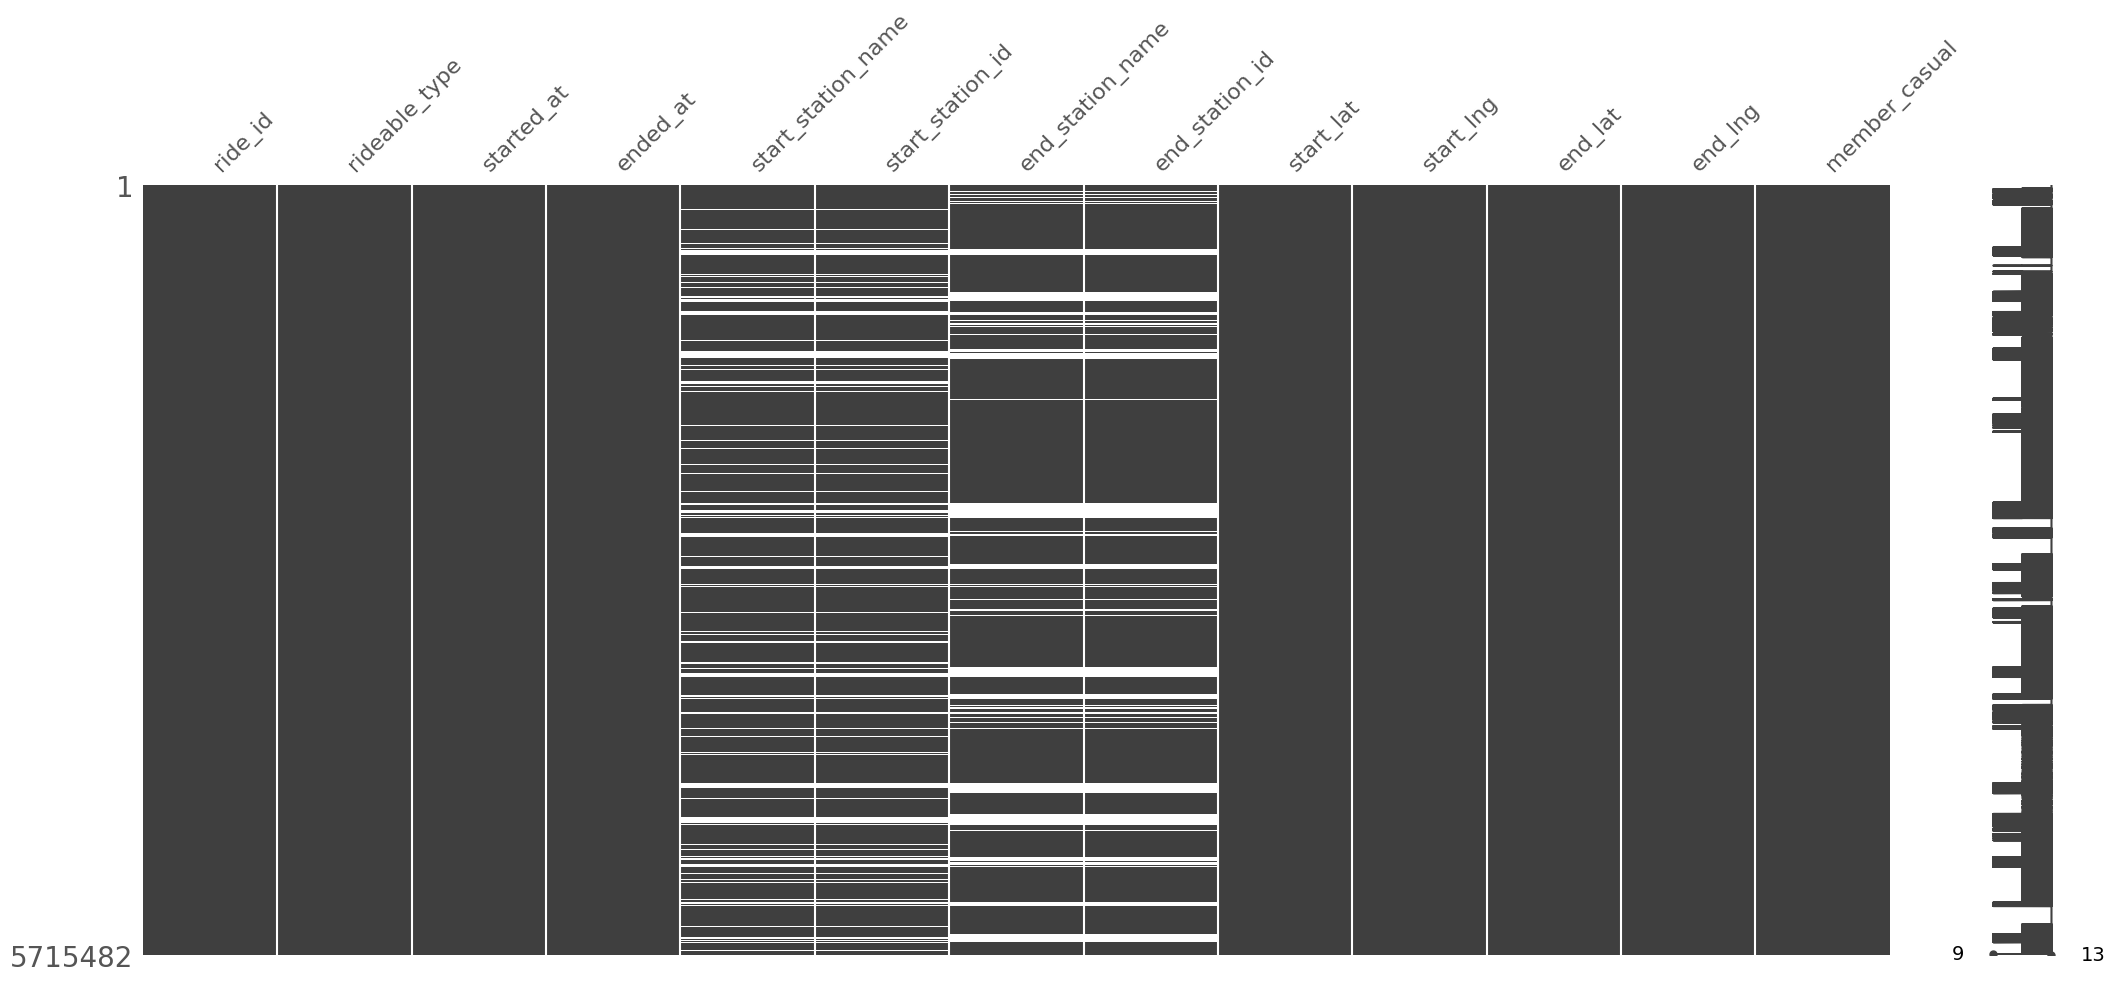

In [13]:
msno.matrix(df)

I'm going to start by replacing missing data with the hopes that it can still be used. I'll continue to investigate a bit here to decide if I need to remove the missing data instead.

In [14]:
# Replacing missing values
df['start_station_name'] = df['start_station_name'].fillna('Unknown')
df['start_station_id'] = df['start_station_id'].fillna('Unknown')
df['end_station_name'] = df['end_station_name'].fillna('Unknown')
df['end_station_id'] = df['end_station_id'].fillna('Unknown')

cd_u = df.loc[df['start_station_name'] == 'Unknown'].sample(n = 100)

cd_u.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
852519,A154234C80CB6FDA,electric_bike,2024-04-27 17:56:43.000,2024-04-27 18:01:30.000,Unknown,Unknown,Unknown,Unknown,41.93,-87.66,41.940000,-87.660000,member
4521068,E706D4DCA3422041,electric_bike,2024-06-15 16:07:38.811,2024-06-15 16:24:41.547,Unknown,Unknown,Wells St & Huron St,TA1306000012,41.94,-87.65,41.894722,-87.634362,member
4710901,95A9EC2AAF298C69,electric_bike,2024-06-12 14:26:19.643,2024-06-12 14:27:43.826,Unknown,Unknown,Unknown,Unknown,41.96,-87.65,41.970000,-87.650000,member
3648290,ADF863244DC9A284,electric_bike,2023-09-09 06:07:13.000,2023-09-09 06:10:20.000,Unknown,Unknown,Unknown,Unknown,41.96,-87.71,41.960000,-87.720000,casual
5335830,8D866A4C97E2BAF3,electric_bike,2024-05-12 09:26:28.000,2024-05-12 10:10:45.000,Unknown,Unknown,Unknown,Unknown,41.91,-87.62,41.950000,-87.640000,casual
4730101,BCC53A64A810AFAA,electric_bike,2024-06-17 19:26:34.708,2024-06-17 19:32:07.589,Unknown,Unknown,Unknown,Unknown,41.91,-87.67,41.900000,-87.680000,member
3443703,E1C673F02FFC8C96,electric_bike,2023-09-27 16:02:17.000,2023-09-27 16:07:24.000,Unknown,Unknown,MLK Jr Dr & 29th St,TA1307000139,41.84,-87.62,41.842052,-87.617000,member
3627332,D0966A361AB6D602,electric_bike,2023-09-30 22:24:43.000,2023-09-30 22:25:29.000,Unknown,Unknown,Unknown,Unknown,41.94,-87.67,41.940000,-87.670000,member
4715031,4773CFF6C2550379,electric_bike,2024-06-24 16:55:02.226,2024-06-24 17:05:48.913,Unknown,Unknown,Unknown,Unknown,41.88,-87.64,41.900000,-87.630000,member
3799522,F9E6EDDB504D16A6,electric_bike,2023-09-18 17:31:45.000,2023-09-18 17:32:10.000,Unknown,Unknown,Unknown,Unknown,41.89,-87.65,41.890000,-87.650000,member


In [15]:
# Creating a geographic scatter plot to see if there is anyway to identify the missing station names based on their latitude and longitude. 
fig = px.scatter_geo(cd_u, lat='start_lat', lon='start_lng',
                     title='Unknown Start Station Name')
fig.show()

## Analyze<a name="analyze"></a>
Now that we've imported the data, set the column data types, dealt with missing values, and become familiar with the info we have to work with, we will begin analyzing the data to derive insights related to our question: How do annual members and casual riders use Cyclistic bikes differently?

In [16]:
# Exploring start stations
df['start_station_name'].loc[df['start_station_name'] != 'Unknown'].value_counts().head(20)

start_station_name
Streeter Dr & Grand Ave               63675
DuSable Lake Shore Dr & Monroe St     41624
Michigan Ave & Oak St                 38367
DuSable Lake Shore Dr & North Blvd    37837
Kingsbury St & Kinzie St              35995
Clark St & Elm St                     34853
Clinton St & Washington Blvd          34243
Wells St & Concord Ln                 31371
Millennium Park                       30750
Clinton St & Madison St               30054
Wells St & Elm St                     29980
Theater on the Lake                   29481
Broadway & Barry Ave                  26145
Wilton Ave & Belmont Ave              25854
Indiana Ave & Roosevelt Rd            25676
Dearborn St & Erie St                 25676
Wabash Ave & Grand Ave                25626
University Ave & 57th St              25512
State St & Chicago Ave                25239
Shedd Aquarium                        24922
Name: count, dtype: int64

In [17]:
# Creating a time delta column to examine the length of each ride
d1 = df['started_at']
d2 = df['ended_at']

diff = d2-d1
df['duration'] = diff
df['duration'].head()

0   0 days 00:12:53
1   0 days 00:12:09
2   0 days 00:04:20
3   0 days 00:05:26
4   0 days 00:11:30
Name: duration, dtype: timedelta64[ns]

In [18]:
# Looking at the data with the new column added
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30


In [19]:
# Examining rides with the longest durations
df.nlargest(5, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
2448719,992B647C22E22513,docked_bike,2023-08-02 19:27:12,2023-10-10 04:56:16,Campbell Ave & Montrose Ave,15623,Unknown,Unknown,41.961484,-87.692321,NaN,NaN,casual,68 days 09:29:04
1731692,24154619AEE96E2C,docked_bike,2023-08-03 22:06:08,2023-10-07 04:56:03,Broadway & Argyle St,13108,Unknown,Unknown,41.973815,-87.659660,NaN,NaN,casual,64 days 06:49:55
1831074,9EC4ACDAA96E516F,docked_bike,2023-08-07 12:16:36,2023-10-04 09:59:11,State St & Van Buren St,TA1305000035,Unknown,Unknown,41.877181,-87.627844,NaN,NaN,casual,57 days 21:42:35
2372946,ED31EE7C8024D292,docked_bike,2023-08-11 18:58:28,2023-10-06 04:33:29,Buckingham Fountain (Michigan/11th),15541,Unknown,Unknown,41.876423,-87.620339,NaN,NaN,casual,55 days 09:35:01
2406247,1A572575C18B600B,docked_bike,2023-08-15 15:19:32,2023-09-29 04:51:14,Shedd Aquarium,15544,Unknown,Unknown,41.867226,-87.615355,NaN,NaN,casual,44 days 13:31:42


In [20]:
# And the rides with the shortest durations
df.nsmallest(5, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
5582375,F584D47AE67FD388,classic_bike,2023-11-05 21:08:17,2023-10-25 07:31:46,Sheffield Ave & Waveland Ave,TA1307000126,Unknown,Unknown,41.949288,-87.654462,41.95,-87.65,casual,-12 days +10:23:29
5620029,AE046C379C20B7CA,classic_bike,2023-11-05 20:46:59,2023-10-25 07:31:46,Sheridan Rd & Irving Park Rd,13063,Unknown,Unknown,41.954297,-87.654399,41.95,-87.65,member,-12 days +10:44:47
5599448,A21D6507DA3C5AD4,classic_bike,2023-11-05 16:41:54,2023-10-25 07:31:46,Pine Grove Ave & Irving Park Rd,TA1308000022,Unknown,Unknown,41.954397,-87.648046,41.95,-87.65,member,-12 days +14:49:52
5595225,DEC5EF8DE27398A0,classic_bike,2023-11-05 11:56:19,2023-10-25 07:31:46,Pine Grove Ave & Irving Park Rd,TA1308000022,Unknown,Unknown,41.954360,-87.648109,41.95,-87.65,casual,-12 days +19:35:27
5619167,7850F6E2343BF766,classic_bike,2023-11-01 16:38:10,2023-10-25 07:31:46,Clark St & Drummond Pl,TA1307000142,Unknown,Unknown,41.931195,-87.644212,41.93,-87.64,casual,-8 days +14:53:36


I'm realizing that the durations on these rides is very skewed. It seems unlikely that there were casual riders with rides that last days, up to 68, and impossible that anyone would have had a ride that lasted a negative amount of time. I'm noticing that all of these outlier records include an unknown start station and/or end station. So, I'm going to go ahead and drop rows with unknown values. In an ideal setting, I would have an engineer I could talk to about those records, but for the purpose of this study, I will proceed without those entries because they significantly skew the data I'm after.  

In [21]:
# Removing records with unknown start or end stations
df = df[df['start_station_name'] != 'Unknown']
df = df[df['end_station_name'] != 'Unknown']

#Checking how many entries are left in our cleaned data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4241241 entries, 0 to 5715692
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  duration            timedelta64[ns]
dtypes: category(2), datetime64[ns](2), float64(4), object(5), timedelta64[ns](1)
memory usage: 428.7+ MB


In [22]:
# Rechecking longest durations
df.nlargest(10, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
1975383,47158A16C754A9F4,docked_bike,2023-08-10 22:17:49,2023-08-15 17:09:02,Larrabee St & Webster Ave,13193,Michigan Ave & Oak St,13042,41.921822,-87.644140,41.900960,-87.623777,casual,4 days 18:51:13
1772455,4031082BC503CC84,docked_bike,2023-08-02 17:28:57,2023-08-06 11:07:57,University Ave & 57th St,KA1503000071,Museum of Science and Industry,KA1503000074,41.791478,-87.599861,41.791728,-87.583945,casual,3 days 17:39:00
1778616,D2273A0F45CDD4CC,docked_bike,2023-08-18 09:13:48,2023-08-20 16:14:38,2112 W Peterson Ave,KA1504000155,Sheridan Rd & Loyola Ave,RP-009,41.991178,-87.683593,42.001044,-87.661198,casual,2 days 07:00:50
2896281,7A5CAAC52FAE9E95,classic_bike,2024-03-09 16:58:39,2024-03-10 18:08:01,Talman Ave & Addison St,15632,Talman Ave & Addison St,15632,41.946636,-87.694615,41.946636,-87.694615,casual,1 days 01:09:22
3697920,7AC23ADF3F785C89,classic_bike,2023-09-29 12:32:03,2023-09-30 13:29:57,Halsted St & 63rd St,KA1503000055,Halsted St & 63rd St,KA1503000055,41.779381,-87.644621,41.779381,-87.644621,casual,1 days 00:57:54
2635039,8AFD9583BC85E0DE,classic_bike,2024-02-01 17:28:26,2024-02-02 18:26:05,Benson Ave & Church St,596,Sheridan Rd & Noyes St (NU),604,42.048214,-87.683485,42.058239,-87.677432,member,1 days 00:57:39
5689334,2503BA4056C4C83B,classic_bike,2023-11-11 11:58:41,2023-11-12 12:56:11,Montrose Harbor,TA1308000012,Clark St & Leland Ave,TA1309000014,41.963982,-87.638181,41.967088,-87.667291,member,1 days 00:57:30
3767134,C65FD7B15C4C410F,classic_bike,2023-09-18 17:57:10,2023-09-19 18:54:33,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.936688,-87.636829,41.936688,-87.636829,member,1 days 00:57:23
2567996,D1B2433CCB28F892,classic_bike,2024-01-17 07:44:28,2024-01-18 08:41:47,Ellis Ave & 60th St,KA1503000014,Harper Ave & 59th St,KA1503000070,41.785097,-87.601073,41.787943,-87.588315,member,1 days 00:57:19
2059315,3309CF3DBCAD8E84,docked_bike,2023-08-20 19:43:06,2023-08-21 20:40:23,Prairie Ave & 43rd St,KA1503000027,Prairie Ave & 43rd St,KA1503000027,41.816659,-87.619412,41.816659,-87.619412,casual,1 days 00:57:17


In [23]:
# And smallest durations
df.nsmallest(10, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
5672272,5C5FCC49C148635F,classic_bike,2023-11-05 01:55:47,2023-11-05 01:01:13,Halsted St & Wrightwood Ave,TA1309000061,Halsted St & Roscoe St,TA1309000025,41.929143,-87.649077,41.943670,-87.648950,member,-1 days +23:05:26
5653865,274EDE47C11F43AF,classic_bike,2023-11-05 01:55:51,2023-11-05 01:02:37,Southport Ave & Wellington Ave,TA1307000006,Southport Ave & Wrightwood Ave,TA1307000113,41.935775,-87.663600,41.928773,-87.663913,casual,-1 days +23:06:46
5476914,0AF3917F317F4C5F,classic_bike,2023-11-05 01:54:43,2023-11-05 01:01:31,Halsted St & 21st St,13162,Racine Ave & 18th St,13164,41.853780,-87.646603,41.858166,-87.656495,casual,-1 days +23:06:48
5635588,D17C0701A2AC27A8,classic_bike,2023-11-05 01:53:49,2023-11-05 01:00:41,Halsted St & Wrightwood Ave,TA1309000061,Sedgwick St & Webster Ave,13191,41.929143,-87.649077,41.922167,-87.638888,member,-1 days +23:06:52
5432129,FBDEF92A65F125D9,classic_bike,2023-11-05 01:58:37,2023-11-05 01:05:42,LaSalle Dr & Huron St,KP1705001026,Clark St & Elm St,TA1307000039,41.894877,-87.632326,41.902973,-87.631280,casual,-1 days +23:07:05
5476903,C182738D5AF4775B,classic_bike,2023-11-05 01:54:15,2023-11-05 01:01:33,Halsted St & 21st St,13162,Racine Ave & 18th St,13164,41.853780,-87.646603,41.858166,-87.656495,casual,-1 days +23:07:18
5640924,822A055416791A8D,classic_bike,2023-11-05 01:55:07,2023-11-05 01:02:40,Larrabee St & Armitage Ave,TA1309000006,Sedgwick St & North Ave,TA1307000038,41.918084,-87.643749,41.911386,-87.638677,casual,-1 days +23:07:33
5647890,A2B29BF080FD1672,classic_bike,2023-11-05 01:55:41,2023-11-05 01:03:22,Damen Ave & Cortland St,13133,Campbell Ave & Fullerton Ave,15648,41.915983,-87.677335,41.924632,-87.689307,casual,-1 days +23:07:41
5652678,368C90D097E27F50,classic_bike,2023-11-05 01:54:53,2023-11-05 01:02:56,Larrabee St & Armitage Ave,TA1309000006,Clark St & Drummond Pl,TA1307000142,41.918084,-87.643749,41.931248,-87.644336,casual,-1 days +23:08:03
5679388,3FE1CB266FEFC4F8,classic_bike,2023-11-05 01:56:53,2023-11-05 01:06:00,Dearborn St & Erie St,13045,Ogden Ave & Chicago Ave,TA1305000020,41.893992,-87.629318,41.896362,-87.654061,member,-1 days +23:09:07


In [24]:
# Removing the remaining negative time durations
df = df[df['duration'] >= pd.Timedelta(0)]

#Confirming removal
df.nsmallest(10, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
4523,008A3B92A7D34888,electric_bike,2023-10-10 16:00:26,2023-10-10 16:00:26,Canal St & Jackson Blvd,13138,Canal St & Jackson Blvd,13138,41.877243,-87.639385,41.877245,-87.639366,member,0 days
6762,1B2A2112D72AF3D9,electric_bike,2023-10-04 21:58:34,2023-10-04 21:58:34,Michigan Ave & 18th St,13150,Michigan Ave & 18th St,13150,41.857966,-87.624612,41.857813,-87.624550,casual,0 days
6832,B97A9E823BD1D734,electric_bike,2023-10-15 13:48:09,2023-10-15 13:48:09,Fairfield Ave & Roosevelt Rd,KA1504000102,Fairfield Ave & Roosevelt Rd,KA1504000102,41.866628,-87.694494,41.866624,-87.694521,member,0 days
7702,F76620719E2AC573,classic_bike,2023-10-30 18:55:50,2023-10-30 18:55:50,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.936253,-87.652662,41.936253,-87.652662,member,0 days
9472,045ECA660D6195F7,classic_bike,2023-10-04 12:19:23,2023-10-04 12:19:23,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,41.892278,-87.612043,41.892278,-87.612043,casual,0 days
10265,7A28F74824688C30,electric_bike,2023-10-19 18:35:43,2023-10-19 18:35:43,Larrabee St & Division St,KA1504000079,Larrabee St & Division St,KA1504000079,41.903522,-87.643291,41.903486,-87.643353,member,0 days
10440,C90E8880524D90C4,classic_bike,2023-10-10 17:22:14,2023-10-10 17:22:14,Franklin St & Adams St (Temp),TA1309000008,Franklin St & Adams St (Temp),TA1309000008,41.879434,-87.635504,41.879434,-87.635504,member,0 days
13358,5A88A2A735837380,classic_bike,2023-10-06 11:23:23,2023-10-06 11:23:23,Clark St & Elm St,TA1307000039,Clark St & Elm St,TA1307000039,41.902973,-87.631280,41.902973,-87.631280,member,0 days
15780,C8B4652B56F8988B,electric_bike,2023-10-20 17:32:17,2023-10-20 17:32:17,Damen Ave & Melrose Ave,13143,Damen Ave & Melrose Ave,13143,41.940530,-87.678556,41.940600,-87.678500,member,0 days
25701,BFE586BA97FC7AB6,electric_bike,2023-10-10 10:36:31,2023-10-10 10:36:31,Logan Blvd & Elston Ave,TA1308000031,Logan Blvd & Elston Ave,TA1308000031,41.929376,-87.684226,41.929465,-87.684158,member,0 days


In [25]:
# Looking at the number of events per rideable type
df['rideable_type'].loc[df['rideable_type'] != 'n/a'].value_counts()

rideable_type
classic_bike     2854413
electric_bike    1371248
docked_bike        15514
Name: count, dtype: int64

In [26]:
# Looking at the average ride time for members vs. casual riders
mc = df.groupby(df['member_casual'])
mc_duration = mc['duration'].mean()

print(mc_duration)

member_casual
casual   0 days 00:24:04.275697968
member   0 days 00:12:30.604388031
Name: duration, dtype: timedelta64[ns]


In [27]:
# Now looking at the number of bike rental events for members vs. casual riders. 
df['member_casual'].value_counts()

member_casual
member    2750869
casual    1490306
Name: count, dtype: int64

In [28]:
# Creating day of the week column to examine  member vs. casual usage on days of the week
df['day_of_week'] = df['started_at'].dt.day_name()
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,day_of_week
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53,Sunday
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09,Wednesday
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20,Thursday
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26,Tuesday
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30,Monday
5,F7D7420AFAC53CD9,electric_bike,2023-10-04 17:10:59,2023-10-04 17:25:21,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898124,-87.637533,41.921540,-87.653818,member,0 days 00:14:22,Wednesday
6,870B2D4CD112D7B7,electric_bike,2023-10-31 17:32:20,2023-10-31 17:44:20,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898177,-87.637549,41.921540,-87.653818,member,0 days 00:12:00,Tuesday
7,D9179D36E32D456C,classic_bike,2023-10-02 18:51:51,2023-10-02 18:57:09,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,casual,0 days 00:05:18,Monday
8,F8E131281F722FEF,classic_bike,2023-10-17 08:28:18,2023-10-17 08:50:03,Calumet Ave & 18th St,13102,Morgan St & Polk St,TA1307000130,41.857618,-87.619411,41.871737,-87.651030,member,0 days 00:21:45,Tuesday
9,91938B71748FA405,classic_bike,2023-10-17 19:17:38,2023-10-17 19:32:23,Wolcott Ave & Polk St,TA1309000064,Morgan St & Polk St,TA1307000130,41.871262,-87.673688,41.871737,-87.651030,member,0 days 00:14:45,Tuesday


In [29]:
df['day_of_week'] = df['day_of_week'].astype('category')
df['day_of_week'].mode()

0    Wednesday
Name: day_of_week, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [30]:
df['day_of_week'] = df['day_of_week'].cat.reorder_categories(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True).sort_values()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,day_of_week
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53,Sunday
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09,Wednesday
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20,Thursday
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26,Tuesday
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30,Monday


In [31]:
count_df = df.groupby(['day_of_week', 'member_casual']).size().unstack(fill_value = 0)
count_df

member_casual,casual,member
day_of_week,,
Sunday,254460,300227
Monday,166574,387331
Tuesday,170675,444175
Wednesday,190444,463606
Thursday,183468,432907
Friday,217250,382518
Saturday,307435,340105


In [32]:
df['rideable_type'].loc[df['rideable_type'] != 'Unknown'].value_counts()

rideable_type
classic_bike     2854413
electric_bike    1371248
docked_bike        15514
Name: count, dtype: int64

In [33]:
# Looking at events per rideable type for member vs. casual riders
rideable_count = df.groupby(['rideable_type', 'member_casual']).size().unstack(fill_value = 0)
rideable_count

member_casual,casual,member
rideable_type,,
classic_bike,975559,1878854
docked_bike,15514,0
electric_bike,499233,872015


In [34]:
# Exploring popular start and end stations for member vs. casual riders
pop_start = df.groupby(['start_station_name', 'member_casual']).size().unstack(fill_value = 0)
pop_start.nlargest(10, 'casual')

member_casual,casual,member
start_station_name,,
Streeter Dr & Grand Ave,45429,14776
DuSable Lake Shore Dr & Monroe St,29993,9456
Michigan Ave & Oak St,22338,13204
DuSable Lake Shore Dr & North Blvd,20090,14922
Millennium Park,19045,9593
Shedd Aquarium,18951,4817
Dusable Harbor,16564,5894
Theater on the Lake,14958,12378
Adler Planetarium,12547,5065


In [35]:
m_pop_start = df.groupby(['start_station_name', 'member_casual']).size().unstack(fill_value = 0)
m_pop_start.nlargest(10, 'member')

member_casual,casual,member
start_station_name,,
Clinton St & Washington Blvd,5655,25601
Kingsbury St & Kinzie St,8164,24985
Clark St & Elm St,9381,22484
Clinton St & Madison St,5993,21556
Wells St & Elm St,8614,18293
Wells St & Concord Ln,9419,18267
University Ave & 57th St,5770,17571
Clinton St & Jackson Blvd,5053,17015
Dearborn St & Erie St,6987,16456


In [36]:
pop_end = df.groupby(['end_station_name', 'member_casual']).size().unstack(fill_value = 0)
pop_end.nlargest(10, 'casual')

member_casual,casual,member
end_station_name,,
Streeter Dr & Grand Ave,49282,12501
DuSable Lake Shore Dr & Monroe St,27551,10091
DuSable Lake Shore Dr & North Blvd,23426,14690
Michigan Ave & Oak St,23237,12754
Millennium Park,21281,8352
Shedd Aquarium,17221,5720
Theater on the Lake,16198,11650
Dusable Harbor,14661,6987
Michigan Ave & 8th St,10565,6031


In [37]:
m_pop_end = df.groupby(['end_station_name', 'member_casual']).size().unstack(fill_value = 0)
m_pop_end.nlargest(10, 'member')

member_casual,casual,member
end_station_name,,
Clinton St & Washington Blvd,5694,26312
Kingsbury St & Kinzie St,7592,24922
Clinton St & Madison St,5737,22653
Clark St & Elm St,8987,22510
Wells St & Concord Ln,9714,18579
Wells St & Elm St,8917,18156
University Ave & 57th St,5732,17802
Clinton St & Jackson Blvd,5522,17089
State St & Chicago Ave,5933,16997


## Share<a name="share"></a>
Now that we've had a chance to analyze the available data, we're going to summarize relevant findings and create  visualizations to share with the marketing team and other key stakeholders. Again, we are answering the question of how usage of the bike rental service differs between members and casual riders.

### Observation #1
The average member pass ride is about half the time of the average casual pass ride. It is unfortunate that there is not a way to parse out the casual pass rides into daily and single-ride passes. However, we can learn from the data as it is  that members' rides are usually shorter than the casual rides. 

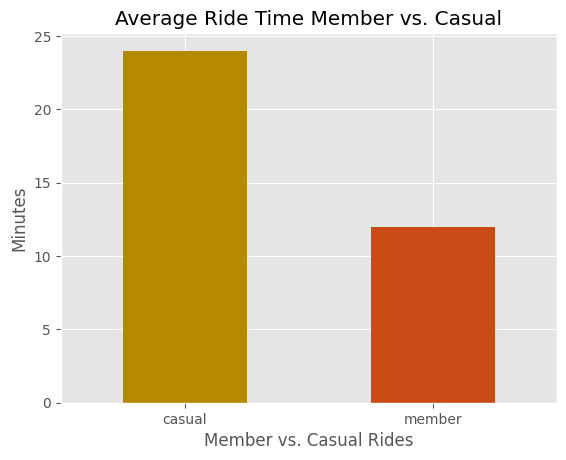

In [38]:
# Turning time delta into minutes and creating a bar chart to show the difference in average ride time
td = mc_duration/60000000000

ax = td.plot(kind='bar', title='Average Ride Time Member vs. Casual', xlabel = 'Member vs. Casual Rides', ylabel = 'Minutes', color = colors)
plt.xticks(rotation = 0)
plt.show()

### Observation #2
We also found that the number of rental events for members is much higher than the number of casual rider rentals. 

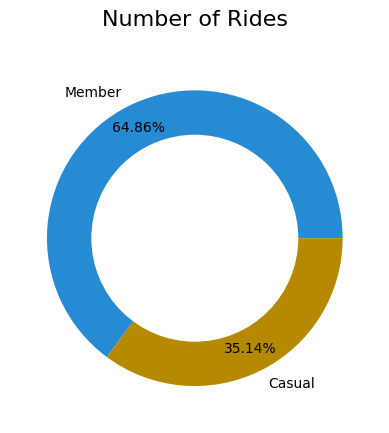

In [39]:
# Creating a pie chart to show the difference in number of rental events
pcount = df['member_casual'].value_counts()
labels = ['Member', 'Casual']

plt.pie(x = pcount, labels = labels, autopct = '%1.2f%%', colors = ['#268bd2', '#b58900'], pctdistance=0.84)
plt.title(
    label = "Number of Rides", 
    fontdict = {"fontsize":16},
    pad = 20
)
centre_circle = plt.Circle((0,0),0.70,fc='#ffffff')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

### Observation #3
We found that weekends are very popular times for casual bike rentals. 

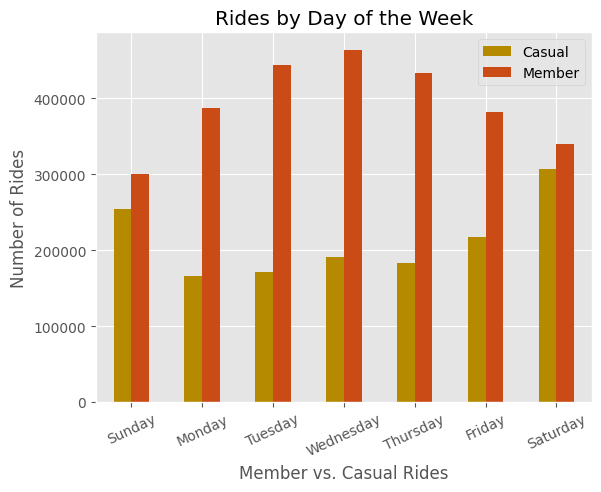

In [40]:
ax = count_df.plot(kind = 'bar', color = colors, xlabel = 'Member vs. Casual Rides', ylabel = 'Number of Rides')
ax.set_title("Rides by Day of the Week")
ax.legend(['Casual', 'Member'])
plt.xticks(rotation = 25)
plt.show()

### Observation #4
We also found that certain starting and ending stations are more popular with members and casual riders. 

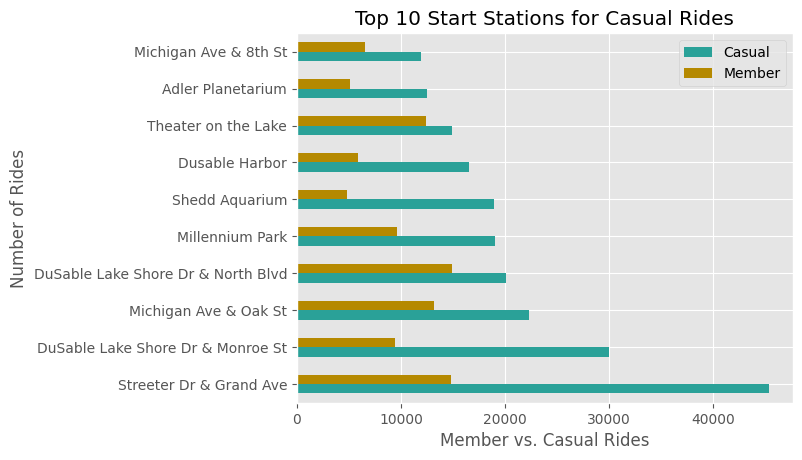

In [41]:
ax = pop_start.nlargest(10, 'casual').plot(kind = 'barh', color = ['#2aa198', '#b58900'], xlabel = 'Member vs. Casual Rides', ylabel = 'Number of Rides')
ax.set_title("Top 10 Start Stations for Casual Rides")
ax.legend(['Casual', 'Member'])
plt.show()

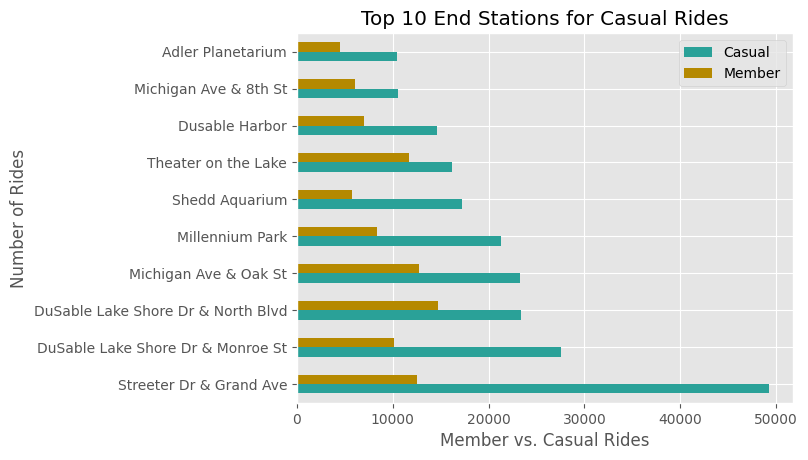

In [42]:
ax = pop_end.nlargest(10, 'casual').plot(kind = 'barh', color = ['#2aa198', '#b58900'], xlabel = 'Member vs. Casual Rides', ylabel = 'Number of Rides')
ax.set_title("Top 10 End Stations for Casual Rides")
ax.legend(['Casual', 'Member'])
plt.show()

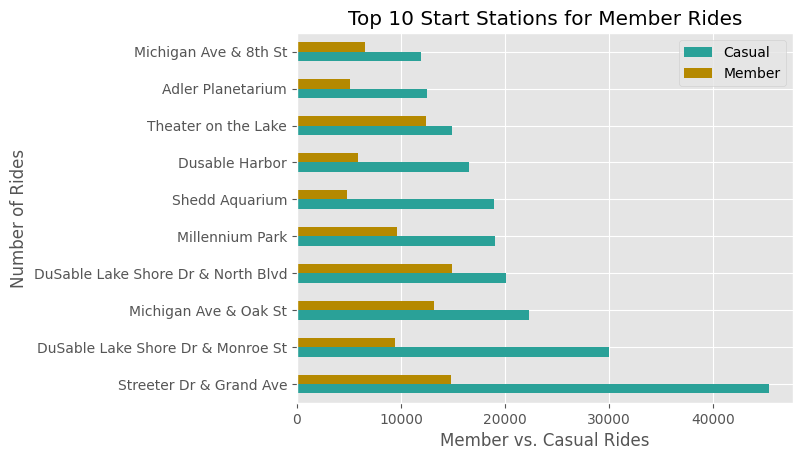

In [43]:
ax = m_pop_start.nlargest(10, 'casual').plot(kind = 'barh', color = ['#2aa198', '#b58900'], xlabel = 'Member vs. Casual Rides', ylabel = 'Number of Rides')
ax.set_title("Top 10 Start Stations for Member Rides")
ax.legend(['Casual', 'Member'])
plt.show()

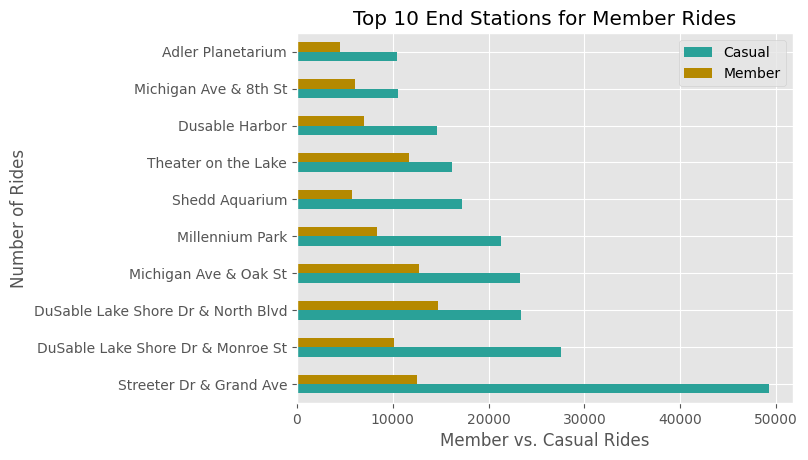

In [44]:
ax = m_pop_end.nlargest(10, 'casual').plot(kind = 'barh', color = ['#2aa198', '#b58900'], xlabel = 'Member vs. Casual Rides', ylabel = 'Number of Rides')
ax.set_title("Top 10 End Stations for Member Rides")
ax.legend(['Casual', 'Member'])
plt.show()

## Act<a name="act"></a>
A few final recommendations for the company to consider.

### Recommendations
- Consider a price per minute pay model. Keep the single ride and daily pass fees and add a cost per minute for actual usage as well. (Observation #1)
- Consider a marketing campaign that focuses on the freedom of being able to ride wherever and whenever you want with the membership. Members ride more, take care of the environment and themselves, and only pay a low monthly price. Find a way to track repeat casual riders offer a promotional rate for their first few months. (Observation #2)
- Consider a higher rate for passes and price per minute on weekends for casual riders. (Observation #3)
- Focus the marketing campaign toward acquiring more members on certain starting and ending stations that are popular with casual riders. (Observation #4)
- A further recommendation would be to understand how we ended up with errors in our data like excessively long rental durations, negative rental durations, and hundreds of thousands of incomplete records. It would also be helpful to capture more information, like repeat casual riders and separating out single-ride passes from day passes.